In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,220 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [2]:
import cv2
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image
from google.colab.patches import cv2_imshow

In [3]:
#image = cv2.imread('')
image='/content/913e88_169803_2.jpg'
extractedInformation = pytesseract.image_to_string(Image.open(image))
print(extractedInformation)

Harinder Baweja
harinder.baweja@hindustan times.com

NEW DELHI: The People's Libera-
tion Army (PLA) violated the
Line of Actual Control several
times in the past two months,
and in several places across the
states of Arunachal Pradesh, Sik-
kim and Uttarakhand, according
to intelligence reports, and secu-
rity and intelligence officials
who asked not to be identified.
The Chinese transgression
was not restricted to Eastern
Ladakh alone, the officials and

Mindustan Cimes

PLA territorial violations since July
not limited to eastern Ladakh: Intel

reports reveal — with, in one
case, the PLA transgressing up
to 40km inside Indian territory
before withdrawing.

Accounts by the officers also
belie Chinese claims of India
transgressing the LAC between
the two countries. They also
point to the larger Chinese strat-
egy: the officials contend that the
increased activity along the
unsettled, approximately 3,500-
km-long border is aimed at keep-
ing the Indian Army on its toes
at multiple plac

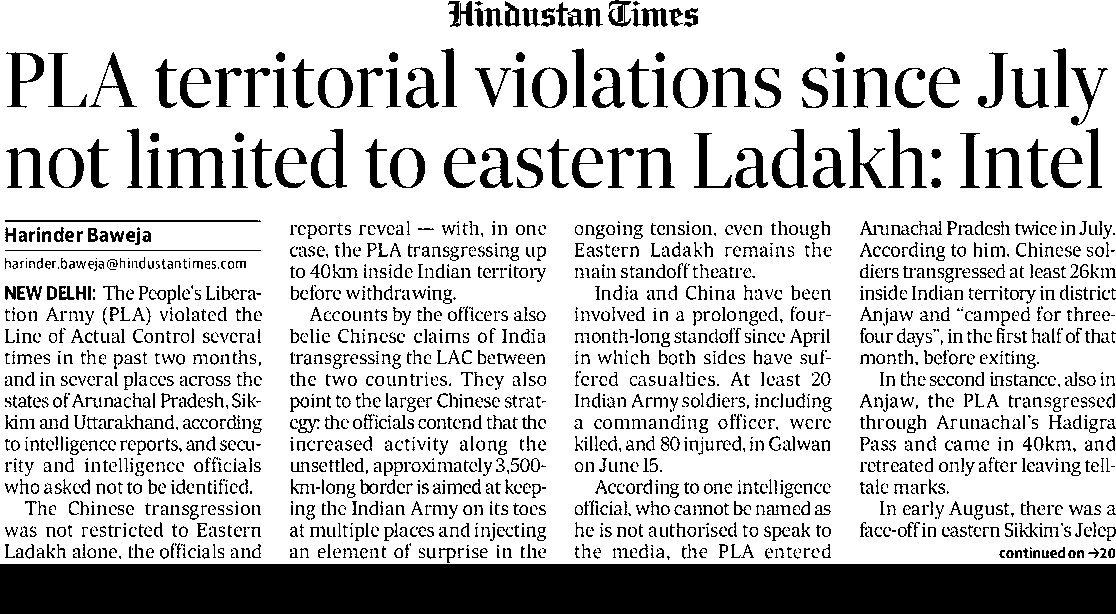

In [4]:
image = cv2.imread('/content/913e88_169803_2.jpg') # reading the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert2grayscale
(thresh, binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # convert2binary
cv2_imshow(binary)
#cv2_imwrite('binary.png', binary)

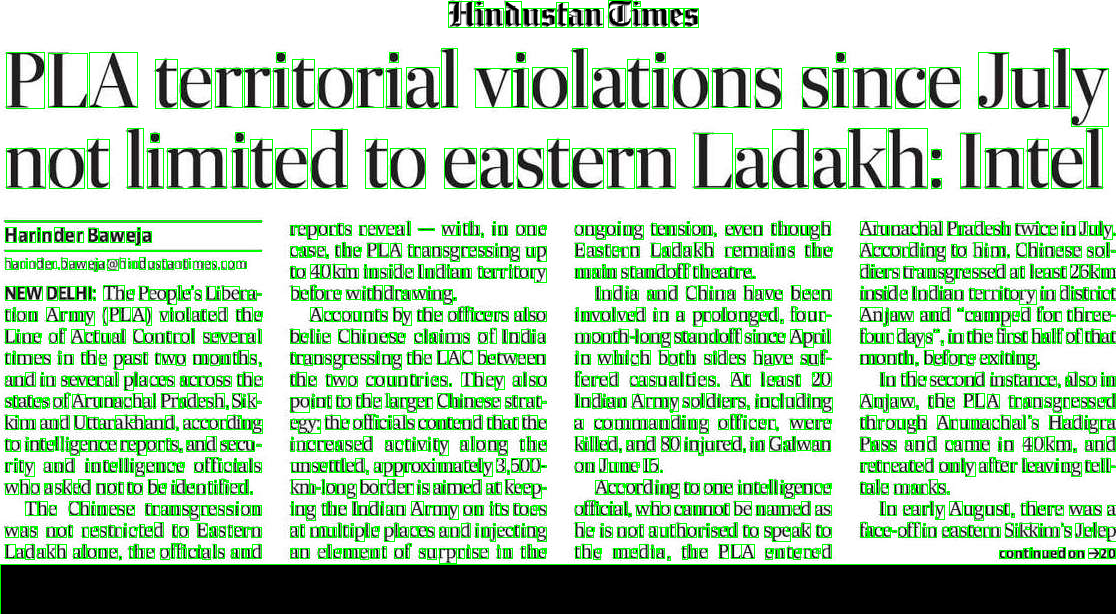

In [5]:
(contours, _) = cv2.findContours(~binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
# find contours
for contour in contours:
    """
    draw a rectangle around those contours on main image
    """
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(image, (x,y), (x+w,y+h), (0, 255, 0), 1)
cv2_imshow(image)
cv2.imwrite('contours.png', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


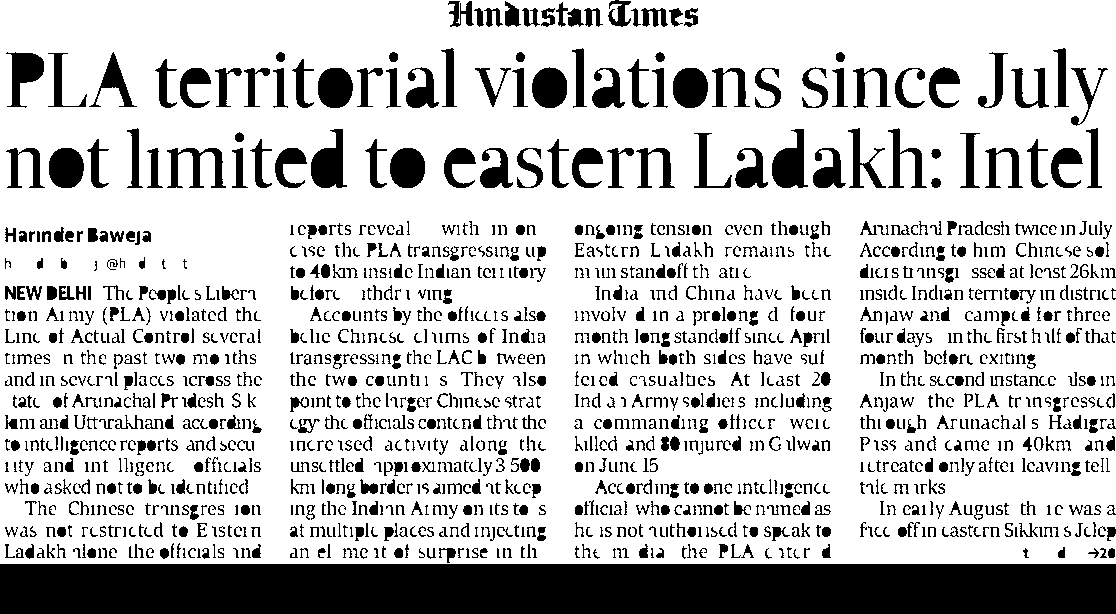

True

In [6]:
import numpy as np
mask = np.ones(image.shape[:2], dtype="uint8") * 255 # create blank image of same dimension of the original image
(contours, _) = cv2.findContours(~binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
heights = [cv2.boundingRect(contour)[3] for contour in contours] # collecting heights of each contour
avgheight = sum(heights)/len(heights) # average height
# finding the larger contours
# Applying Height heuristic
for c in contours:
    [x,y,w,h] = cv2.boundingRect(c)
    if h > 9.9:
        cv2.drawContours(mask, [c], -1, 0, -1)
cv2_imshow(mask)
cv2.imwrite('filter.png', mask)

In [7]:
!pip install pythonRLSA

     |████████████████████████████████| 3.8MB 2.7MB/s 
  Created wheel for pythonRLSA: filename=pythonRLSA-0.0.2-cp36-none-any.whl size=3829772 sha256=50d74a7a63f2897a8fbe8b7bec275080ccb8148ba1068496723942373a0c1afc
  Stored in directory: /root/.cache/pip/wheels/f0/96/3f/54bed785769134babb35d49f44c541a98dd850d05b2eb24750
Successfully built pythonRLSA


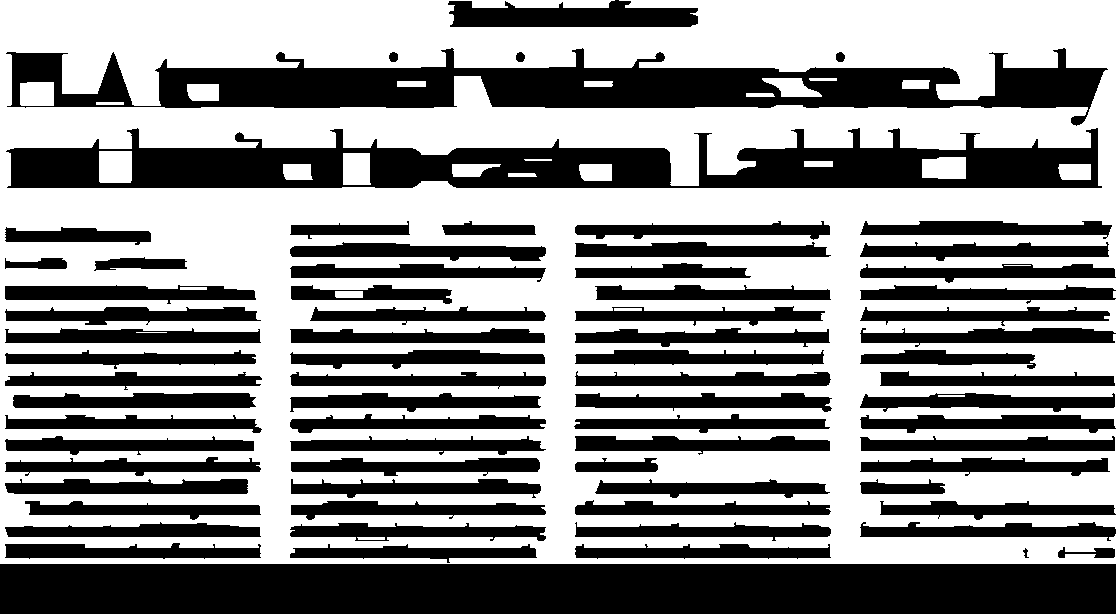

True

In [8]:
from pythonRLSA import rlsa
import math
x, y = mask.shape
value = max(math.ceil(x/100),math.ceil(y/100))+15 #heuristic
mask = rlsa.rlsa(mask, True, False, value) #rlsa application
cv2_imshow(mask)
cv2.imwrite('rlsah.png', mask)

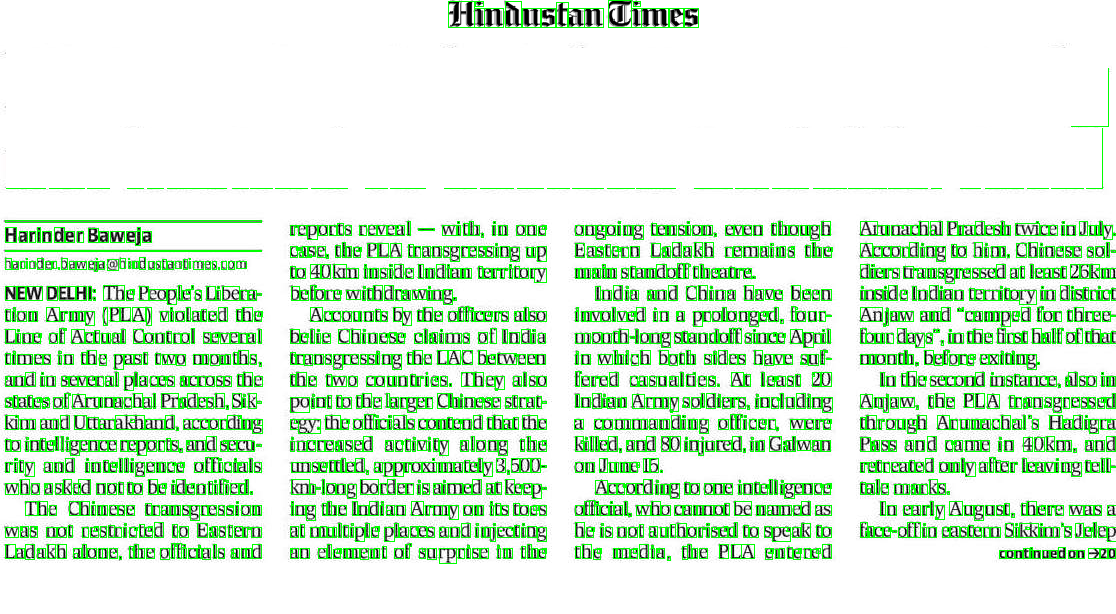

In [15]:
(contours, _) = cv2.findContours(~mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) # find contours
mask2 = np.ones(image.shape, dtype="uint8") * 255 # blank 3 layer image
for contour in contours:
    [x, y, w, h] = cv2.boundingRect(contour)
    if w > 0.60*image.shape[1]: # width heuristic applied
        title = image[y: y+h, x: x+w] 
        mask2[y: y+h, x: x+w] = title # copied title contour onto the blank image
        image[y: y+h, x: x+w] = 255 # nullified the title contour on original image
#cv2_imshow(mask2)
        cv2.imwrite('title.png', mask2)
#cv2_imshow(image)
        cv2.imwrite('content.png',image)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
from PIL import Image
from PIL import ImageOps
import pytesseract
title = pytesseract.image_to_string(Image.fromarray(mask2))
content = pytesseract.image_to_string(Image.fromarray(image))

In [11]:
print(title[2][0][0])

A


In [12]:
a=[]
for i in title:
  #print(count)
  a.append(i)
  #print(i)
#print(a)
for i in range(len(a)):
  if a[i] == "\n":
    a[i] = " "
headline="".join(a)
print(headline)
  #count+=1
#for i in range(len(title)) :  
 #   for j in range(len(title[i])) :
  #    for k in range(len(title[i][j])):
   #     print(title[i][j][k],end=" ")

    #print('\t')
 

PLA territorial violations since July not limited to eastern Ladakh: Intel    


In [13]:
a=[]
for i in content:
  #print(count)
  a.append(i)
  #print(i)
#print(a)
for i in range(len(a)):
  if a[i] == "\n":
    a[i] = " "
headline="".join(a)
print(headline)

Harinder Baweja  aiodien.biaweja Wind astaaticnes.com NEW DELHI: (The People’s Libera- tion Alrmy, (PUA) violated the Dine of Actual Control several times in tie past two momths, and im sevenal places across tie: states of Arunachal Prailesh, SEK Kino and Uttarakhand, according, to intelligence reponts. andisecu- rity) aod intelligence officials who askdd nonto be identified. Chimese toamsgressiom WAS not pesthioted to Bastern Dadakb alone, the offictals amid        repocts ceveal — with, in one case, the POA tnansgressing up to 40kin inside Indiam territory, ee withdrawing.  its by the officers also tl ese claims off India transgressing the TAQ Between the two countries. Mey also point fo the langen Chinese strat- egy; thie officials contend) that tile increased activity along the unsettled, approximately 3,500- kni-long borden is aimed at Keep- ing the Indian Alrmy, on ifs toes at multiple places andl injecting an clement of surpoise tm the        ongoing tension, even though Basteno